In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import yfinance as yf 

In [2]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S&P_500_companies')[0]['Symbol']

print(tickers)

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object


[*********************100%%**********************]  1 of 1 completed


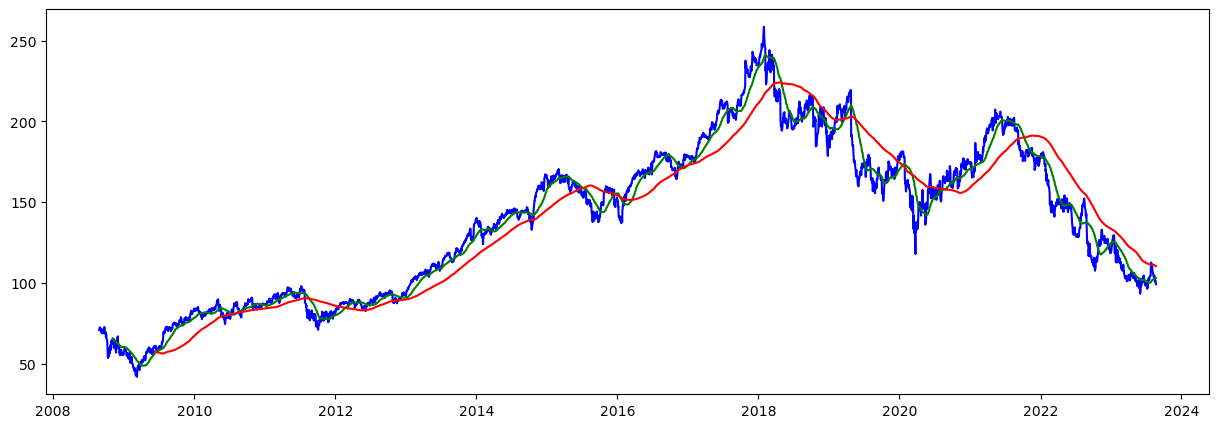

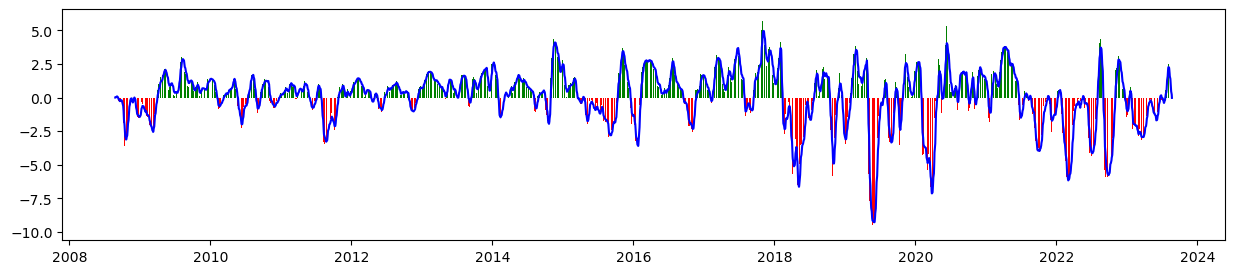

,Open,Close,Volume,Prev_Close,Prev_Volume,Weekday,5SMA,10SMA,20SMA,50SMA,100SMA,200SMA,MACD,MACD_signal
Date,,,,,,,,,,,,,,
2008-08-25,71.470001,70.730003,3733200,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-26,70.470001,70.720001,2761100,70.730003,3733200.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2008-08-27,70.690002,70.720001,3481300,70.720001,2761100.0,2,NaN,NaN,NaN,NaN,NaN,NaN,-0.000798,-0.000160
2008-08-28,71.010002,72.500000,3889600,70.720001,3481300.0,3,NaN,NaN,NaN,NaN,NaN,NaN,-0.001414,-0.000410
2008-08-29,72.139999,71.599998,3440100,72.500000,3889600.0,4,NaN,NaN,NaN,NaN,NaN,NaN,0.140114,0.027694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-16,100.769997,100.790001,2853400,101.139999,3345200.0,2,103.344000,104.768002,106.582501,102.985800,102.5112,110.80635,-0.000521,0.946843
2023-08-17,101.230003,101.800003,3404100,100.790001,2853400.0,3,102.760001,103.956001,106.448001,103.042000,102.5091,110.69630,-0.314258,0.694623
2023-08-18,99.980003,100.010002,2632100,101.800003,3404100.0,4,102.340001,103.417001,106.323501,103.112200,102.5157,110.57230,-0.475912,0.460516


In [5]:
def calc_macd(data, len1, len2, len3):
    shortEMA = data.ewm(span=len1, adjust=False).mean()
    longEMA = data.ewm(span=len2, adjust=False).mean()
    MACD = shortEMA - longEMA
    signal = MACD.ewm(span=len3, adjust=False).mean()
    return MACD, signal


for ticker in tickers[0:1]:
    end_date = datetime.now()
    start_date = end_date - timedelta(days=15*365)
    
    history = yf.download(ticker, start=start_date, end=end_date, interval='1d', prepost=False)
    history = history.loc[:,['Open', 'Close', 'Volume']]
    
    history['Prev_Close'] = history.loc[:, 'Close'].shift(1)
    history['Prev_Volume'] = history.loc[:, 'Volume'].shift(1)
    
    datetimes = history.index.values
    weekdays = []
    
    for dt in datetimes:
        dt = datetime.strptime(str(dt), '%Y-%m-%dT%H:%M:%S.000000000')
        weekdays.append(dt.weekday())
        
    history['Weekday'] = weekdays
    
    history['5SMA'] = history['Prev_Close'].rolling(5).mean()
    history['10SMA'] = history['Prev_Close'].rolling(10).mean()
    history['20SMA'] = history['Prev_Close'].rolling(20).mean()
    history['50SMA'] = history['Prev_Close'].rolling(50).mean()
    history['100SMA'] = history['Prev_Close'].rolling(100).mean()
    history['200SMA'] = history['Prev_Close'].rolling(200).mean()
    
    
    MACD, signal = calc_macd(history['Prev_Close'], 12, 26, 9)
    history['MACD'] = MACD
    history['MACD_signal'] = signal
    
    x = history.index.values
    
    plt.figure(figsize=(15,5))
    plt.plot(x, history['Prev_Close'], color='blue')
    plt.plot(x, history['50SMA'], color = 'green')
    plt.plot(x, history['200SMA'], color = 'red')
    plt.show()
    
    plt.figure(figsize=(15,3))
    colors = np.array(['green']*len(history['MACD']))
    colors[history['MACD']<0] = 'red'
    plt.bar(x, history['MACD'], color=colors)
    plt.plot(x, history['MACD_signal'], color='blue')
    plt.show()
    
    display(history)